# Preliminares

## Importación de Librerias  

In [ ]:
# Importamos todo lo que usaremos
from scipy.stats import poisson
from scipy.stats import bernoulli
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import mpmath
import math
import random

## Definición de funciones para la modelación


In [ ]:
#Seleccionara dos elementos aleatoriamente uno despues del otro
def SeleccionaElementos(lista):
    lista1=lista.copy()
    l1=len(lista1)
    s1=sum(lista1)
    p1=random.randint(1,s1)
    k1=1
    i1=0
    while(k1<=p1):
        k1=lista1[i1]+k1
        i1=i1+1

    lista1[i1-1]=lista1[i1-1]-1
    lista2=lista1.copy()
    l2=len(lista2)
    s2=sum(lista2)
    p2=random.randint(1,s2)
    k2=1
    i2=0
    while(k2<=p2):
        k2=lista2[i2]+k2
        i2=i2+1
    lista2[i2-1]=lista2[i2-1]-1
    return(i1-1,i2-1)
#Ejecutaremos la Coalescencia
def Coalescencia(lista):
    i,j=SeleccionaElementos(lista)
    if(i!=j):
        if(i<j):
            lista[i]=lista[i]+lista[j]-1
            lista.pop(j)
        else:
            lista[j]=lista[i]+lista[j]-1
            lista.pop(i)

    else:
        lista[i]=lista[i]-1
    return(lista)
#Usaremos Coalescenciaij cuando necesitemos conocer exactamente que bloques fueron elegidos para coalescer.
def Coalescenciaij(lista):
    i,j=SeleccionaElementos(lista)
    if(i!=j):
        if(i<j):
            lista[i]=lista[i]+lista[j]-1
            lista.pop(j)
        else:
            lista[j]=lista[i]+lista[j]-1
            lista.pop(i)

    else:
        lista[i]=lista[i]-1
    return(lista,i,j)


#mul es la distribución pedida para las bifurcaciones
def Bifurcacion(lista):
    mul=DistribucionBifu()
    while(mul<1):
      mul=DistribucionBifu()
    l=len(lista)
    s=sum(lista)
    p=random.randint(1,s)
    k=1
    i=0
    while(k<=p):
        k=lista[i]+k
        i=i+1
    lista[i-1]=lista[i-1]+mul-1
    return(lista)


#Promedio de Tiempos para m veces el modelo
def TiempoPromedioUltimo(tamano_lista,lista,sigma,configuracion,num_ejecuciones):
    T=[]
    for i in range(1,num_ejecuciones+1):
        T.append(ModeloTiemposUltimo(tamano_lista,lista,sigma,configuracion))

    Promedio=sum(T)/len(T)

    print(Promedio)


#Promedio de Tiempos para m veces el modelo
def TiempoPromedioPrimer(tamano_lista,lista,sigma,configuracion,num_ejecuciones):
    T=[]
    for i in range(1,num_ejecuciones+1):
        T.append(ModeloTiemposPrimer(tamano_lista,lista,sigma,configuracion))

    Promedio=sum(T)/len(T)

    print(Promedio)

# Función para analizar los datos
def analyze_data(data, title):
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    variance = np.var(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    coef_var = std_dev / mean


    print(f"Análisis para {title}:")
    print(f"  Media: {mean}")
    print(f"  Mediana: {median}")
    print(f"  Desviación estándar: {std_dev}")
    print(f"  Varianza: {variance}")
    print(f"  Sesgo (Asimetría): {skewness}")
    print(f"  Curtosis: {kurtosis}")
    print(f"  Coeficiente de variación: {coef_var}\n")

    # Crear histograma sin la superposición de la distribución normal
    plt.hist(data, bins=50, edgecolor='black', alpha=0.6)
    plt.title(f'Histograma ({title})')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

#Con el objetivo de Comparar el bloque que coalescio con el que no, definimos dos funciones para el cuociente y la resta.
def CuocientePromedioPrimeraConexidad(tamano_lista,lista,sigma,configuracion,num_ejecuciones):

    T=[]
    for i in range(1,num_ejecuciones+1):
        lista1=lista.copy()
        lista1,l,k=ModeloHistogramaPrimer(tamano_lista,lista,sigma,configuracion)
        tamaño=len(lista1)
        j=0
        if(l<k):
            while(j!=-1):
                if(j!=l):

                    peq=j
                    j=-2
                j=j+1

            BloqueC=lista1[l]

            BloqueNoC=lista1[peq]
        else:
            while(j!=-1):
                if(j!=k):

                    peq=j
                    j=-2
                j=j+1
            BloqueC=lista1[k]
            BloqueNoC=lista1[peq]

        T.append(BloqueNoC/BloqueC)


    return(T)

def RestaPromedioPrimeraConexidad(tamano_lista,lista,sigma,configuracion,num_ejecuciones):
    T=[]

    for i in range(1,num_ejecuciones+1):
        lista1,l,k=ModeloHistogramaPrimer(tamano_lista,lista,sigma,configuracion)
        tamaño=len(lista)
        j=0
        if(l<k):
            while(j!=-1):
                if(j!=l):

                    peq=j
                    j=-2
                j=j+1

            BloqueC=lista1[l]

            BloqueNoC=lista1[peq]
        else:
            while(j!=-1):
                if(j!=k):

                    peq=j
                    j=-2
                j=j+1
            BloqueC=lista1[k]
            BloqueNoC=lista1[peq]

        T.append(BloqueC-BloqueNoC)


    return(T)

## Creacion de los modelos de Tiempos, Graficos y  para los Histogramas.

Creación de Modelo de Tiempos N=2000




In [ ]:
def ModeloTiemposPrimer(tamano_lista,lista,sigma,configuracion):
    if(configuracion==True):
        lista1=lista.copy()
    else:
        lista= [DistribucionBlo()for _ in range(tamano_lista)]
        for i in range(tamano_lista):
            while(lista[i]<1):
              lista[i]=DistribucionBlo()
        lista1=lista.copy()
    s=sum(lista1)
    lambda1=s*(s-1)/2
    lambda2=sigma*s
    N=20000
    bp=(lambda1+lambda2)/N
    i=0
    lista0=lista.copy()
    a=len(lista0)
    while(len(lista1)==a):
        if(np.random.binomial(n=1, p=bp)==1):

            if(random.uniform(0, 1)<= lambda1/(lambda1+lambda2)):
                lista1=Coalescencia(lista1)
            else:
                lista1=Bifurcacion(lista1)
            s=sum(lista1)
            lambda1=s*(s-1)/2
            lambda2=sigma*s
            bp=(lambda1+lambda2)/N
        tiempos=i/N
        i=i+1
    return(tiempos)
def ModeloTiemposUltimo(tamano_lista,lista,sigma,configuracion):
    if(configuracion==True):
        lista1=lista.copy()
    else:
        lista= [DistribucionBlo()for _ in range(tamano_lista)]
        for i in range(tamano_lista):
            while(lista[i]<1):
              lista[i]=DistribucionBlo()
        lista1=lista.copy()
    s=sum(lista1)
    lambda1=s*(s-1)/2
    lambda2=sigma*s
    N=20000
    bp=(lambda1+lambda2)/N
    i=0
    while(len(lista1)>1):
        if(np.random.binomial(n=1, p=bp)==1):
            if(random.uniform(0, 1)<= lambda1/(lambda1+lambda2)):
                lista1=Coalescencia(lista1)
            else:
                lista1=Bifurcacion(lista1)
            s=sum(lista1)
            lambda1=s*(s-1)/2
            lambda2=sigma*s
            bp=(lambda1+lambda2)/N


        tiempos=i/N
        i=i+1
    return(tiempos)


Creación de Modelo Grafico N=2000

In [ ]:
def ModeloGraficoPrimerConex(tamano_lista,lista,sigma,configuracion):
    if(configuracion==True):
        lista1=lista.copy()
    else:
        lista= [DistribucionBlo()for _ in range(tamano_lista)]
        for i in range(tamano_lista):
            while(lista[i]<1):
              lista[i]=DistribucionBlo()
        lista1=lista.copy()
    s=sum(lista1)
    lambda1=s*(s-1)/2
    lambda2=sigma*s
    N=20000
    bp=(lambda1+lambda2)/N
    i=0
    lista0=lista.copy()
    a=len(lista0)
    print(lista1)
    while(len(lista1)==a):
        if(np.random.binomial(n=1, p=bp)==1):

            if(random.uniform(0, 1)<= lambda1/(lambda1+lambda2)):
                lista1=Coalescencia(lista1)
            else:
                lista1=Bifurcacion(lista1)
            print(lista1)
            s=sum(lista1)
            lambda1=s*(s-1)/2
            lambda2=sigma*s
            bp=(lambda1+lambda2)/N
        i=i+1
    return(lista1)
def ModeloGraficoUltimaConex(tamano_lista,lista,sigma,configuracion):
    if(configuracion==True):
        lista1=lista.copy()
    else:
        lista= [DistribucionBlo()for _ in range(tamano_lista)]
        for i in range(tamano_lista):
            while(lista[i]<1):
              lista[i]=DistribucionBlo()
        lista1=lista.copy()
    s=sum(lista1)
    lambda1=s*(s-1)/2
    lambda2=sigma*s
    N=20000
    bp=(lambda1+lambda2)/N
    i=0
    lista0=lista.copy()
    a=len(lista0)
    print(lista1)
    while(len(lista1)>1):
        if(np.random.binomial(n=1, p=bp)==1):

            if(random.uniform(0, 1)<= lambda1/(lambda1+lambda2)):
                lista1=Coalescencia(lista1)
            else:
                lista1=Bifurcacion(lista1)
            print(lista1)
            s=sum(lista1)
            lambda1=s*(s-1)/2
            lambda2=sigma*s
            bp=(lambda1+lambda2)/N
        i=i+1
    return(lista1)

Creación de Modelo para Futuros Histogramas, N=2000

In [ ]:
#Realizaremos un Modelo para Comparar el bloque que coalescio en \tau con alguno que no.
def ModeloHistogramaPrimer(tamano_lista,lista,sigma,configuracion):
    if(configuracion==True):
        lista1=lista.copy()
    else:
        lista= [DistribucionBlo()for _ in range(tamano_lista)]
        for i in range(tamano_lista):
            while(lista[i]<1):
              lista[i]=DistribucionBlo()
        lista1=lista.copy()
    s=sum(lista1)
    lambda1=s*(s-1)/2
    lambda2=sigma*s
    N=20000
    bp=(lambda1+lambda2)/N
    i=0
    lista0=lista.copy()
    a=len(lista0)
    while(len(lista1)==a):
        if(np.random.binomial(n=1, p=bp)==1):

            if(random.uniform(0, 1)<= lambda1/(lambda1+lambda2)):
                lista1,l,k=Coalescenciaij(lista1)
            else:
                lista1=Bifurcacion(lista1)
            s=sum(lista1)
            lambda1=s*(s-1)/2
            lambda2=sigma*s
            bp=(lambda1+lambda2)/N
        i=i+1
    return(lista1,l,k)

## Definición de los ejecutables para los modelos

In [ ]:
#Ejecutara el modelo ccrrespondiente dependiendo de las respuestas del usuario
def ejecutar_simulacion(tamano_lista, lista, sigma, configuracion,num_ejecuciones):
    if(primer_momento==True):
        print("El tiempo promedio de la primera conexión entre familias es de: ")
        TiempoPromedioPrimer(tamano_lista,lista,sigma,configuracion,num_ejecuciones)
    else:
        print("El tiempo promedio de la ultima conexión entre familias es de: ")
        TiempoPromedioUltimo(tamano_lista,lista,sigma,configuracion,num_ejecuciones)

def ejecutar_simulacion_grafica(tamano_lista, lista, sigma, configuracion):
    if(primer_momento==True):
         print("Un ejemplo del Comportamiento del Modelo para la primera conexión es: ")
         ModeloGraficoPrimerConex(tamano_lista,lista,sigma,configuracion)
    else:
         print("Un ejemplo del Comportamiento del Modelo para la ultima conexión es: ")
         ModeloGraficoUltimaConex(tamano_lista,lista,sigma,configuracion)

def HistogramaResta(tamano_lista, lista, sigma, configuracion,num_ejecuciones):
    data=RestaPromedioPrimeraConexidad(tamano_lista,lista,sigma,configuracion,num_ejecuciones)
    if(configuracion==True):
        titulo = r"$\sigma = {}, X = {}$".format(sigma,len(lista) )
    else:
        titulo = r"$\sigma = {}, X = {}$".format(sigma,tamano_lista )
    analyze_data(data, titulo)
def HistogramaCuociente(tamano_lista, lista, sigma, configuracion,num_ejecuciones):
    data=CuocientePromedioPrimeraConexidad(tamano_lista,lista,sigma,configuracion,num_ejecuciones)
    if(configuracion==True):
        titulo = r"$\sigma = {}, X = {}$".format(sigma,len(lista) )
    else:
        titulo = r"$\sigma = {}, X = {}$".format(sigma,tamano_lista )
    analyze_data(data, titulo)


# Definiciones Generales del ASG

In [ ]:
# Preguntar si se desea para el primer momento de conexión entre bloques o hasta el final del proceso
configuracionbloques = input("¿Desea dar la configuración de bloques o definirla dada una distribución? (conf/dis): ").strip().lower()

# Guardar True si la respuesta es "conf" y False si es "dis"
configuracion = configuracionbloques == 'conf'

if (configuracion==True):
    # Pedir al usuario que ingrese una lista en formato de lista de Python
    lista_usuario = input("Ingrese una lista de valores en formato de lista de Python (ej:  [1, 2, 3, 4] ): ")

    # Evaluar la cadena de entrada para convertirla en una lista de Python
    lista = eval(lista_usuario)
    # Pedir al usuario que ingrese la distribución completa o un valor para las bifurcaciones
    print("Definiremos el mecanismo para las Bifurcaciones, estara condicionada a ser mayor que 0")
    entrada_usuario2 = input("Ingrese la distribución de probabilidad (ej: 2 ) o un valor: ")
    # Definir la función
    def DistribucionBifu():
        return eval(entrada_usuario2)
   # Ejemplo de cómo usar la función
    nuevo_valor = DistribucionBifu()
    print(f"Ejemplo de la distribución dada: {nuevo_valor}")
    sigma = float(input("¿Con que tasa ocurriran las bifuraciones?: "))
    # Preguntar si se desea para el primer momento de conexión entre bloques o hasta el final del proceso
    respuesta_usuario3 = input("¿Desea valores para el primer momento de conexión entre bloques o hasta el ultimo? (primer/ultimo): ").strip().lower()

    # Guardar True si la respuesta es "primer" y False si es "ultimo"
    primer_momento = respuesta_usuario3 == 'primer'


    num_ejecuciones = int(input("¿Cuántas veces desea ejecutar el modelo para promediarlo?: "))
    print("Se ha definido que trabajaremos con una configuración inicial de '", lista_usuario,
      "', con las bifurcaciones dadas por la distribución '", entrada_usuario2,
      "' a tasa ", sigma, " y se ejecutará la simulación una cantidad de ", num_ejecuciones,
      " hasta el ", respuesta_usuario3, " momento de conexión.")
    # Definimos el tamaño solo para escribir el modelo general
    tamano_lista=0
else:
    # Pedir al usuario que ingrese el tamaño de la lista de bloques junto a la distribución completa o un valor para los

    print("Definiremos la distribución de los bloques y la cantidad de ellos")
    # Pedir al usuario que ingrese la distribución completa
    print("¡Alerta!")
    print("La distribución para los bloques estara condicionada a ser mayor que 0.")
    entrada_usuario1 = input("Ingrese la distribución de probabilidad (ej: np.random.poisson(6, 1)[0] ): ")

    # Pedir al usuario que ingrese el tamaño de la lista
    tamano_lista = int(input("Ingrese el tamaño de la lista: "))

    # Definir la función para obtener valores de la distribución
    def DistribucionBlo():
        return eval(entrada_usuario1)

    # Generar la lista con el tamaño especificado
    lista_valores = [DistribucionBlo()for _ in range(tamano_lista)]

    print(f"Ejemplo de lista: {lista_valores}")
    # Pedir al usuario que ingrese la distribución completa o un valor para las bifurcaciones
    print("Definiremos el mecanismo para las Bifurcaciones, estara condicionada a ser mayor que 0")
    entrada_usuario2 = input("Ingrese la distribución de probabilidad (ej: 2) o un valor: ")

    # Definir la función
    def DistribucionBifu():
        return eval(entrada_usuario2)

    # Ahora puedes usar obtener_valor() en cualquier momento para generar nuevos valores de la distribución
    # Ejemplo de cómo usar la función
    nuevo_valor = DistribucionBifu()
    print(f"Ejemplo de la distribución dada: {nuevo_valor}")
    sigma = float(input("¿Con que tasa ocurriran las bifuraciones?: "))
    # Preguntar si se desea para el primer momento de conexión entre bloques o hasta el final del proceso
    respuesta_usuario3 = input("¿Desea valores para el primer momento de conexión entre bloques o hasta el ultimo? (primer/ultimo): ").strip().lower()

    # Guardar True si la respuesta es "primer" y False si es "ultimo"
    primer_momento = respuesta_usuario3 == 'primer'


    num_ejecuciones = int(input("¿Cuántas veces desea ejecutar el modelo para promediarlo?: "))
    print("Se ha definido que trabajaremos con una lista de tamaño ",tamano_lista," que se genera dada una distribución ´",entrada_usuario1,"´, para bifurcaciones con distribución ´",entrada_usuario2,"´ a tasa ",sigma," y se ejecutara la simulación una cantidad de ",num_ejecuciones ," hasta el ",respuesta_usuario3," momento de conexión.")
    # Definimos la lista solo para escribir el modelo general
    lista=[]




¿Desea dar la configuración de bloques o definirla dada una distribución? (conf/dis): conf
Ingrese una lista de valores en formato de lista de Python (ej:  [1, 2, 3, 4] ): [1,2,1,10]
Definiremos la distribución de las Bifurcaciones
Ingrese la distribución de probabilidad (ej: 2 ) o un valor: 2
Ejemplo de la distribución dada: 2
¿Con que tasa ocurriran las bifuraciones?: 4
¿Desea valores para el primer momento de conexión entre bloques o hasta el ultimo? (primer/ultimo): ultimo
¿Cuántas veces desea ejecutar el modelo para promediarlo?: 100
Se ha definido que trabajaremos con una configuración inicial de ' [1,2,1,10] ', con las bifurcaciones dadas por la distribución ' 2 ' a tasa  4.0  y se ejecutará la simulación una cantidad de  100  hasta el  ultimo  momento de conexión.


#Ejecución De las Simulaciones

Para obtener tiempos

In [ ]:
ejecutar_simulacion(tamano_lista, lista, sigma, configuracion,num_ejecuciones)

El tiempo promedio de la ultima conexión entre familias es de: 
0.11360499999999997


Ejemplo de la manera grafica del comportamiento de las simulaciones


In [ ]:
ejecutar_simulacion_grafica(tamano_lista, lista, sigma, configuracion)

Un ejemplo del Comportamiento del Modelo para la ultima conexión es: 
[1, 2, 1, 10]
[1, 11, 1]
[11, 1]
[12, 1]
[13, 1]
[14, 1]
[13, 1]
[14, 1]
[13, 1]
[12, 1]
[11, 1]
[10, 1]
[9, 1]
[10, 1]
[11, 1]
[12, 1]
[11, 1]
[12, 1]
[13, 1]
[13]


# Graficos y Resultados

## Histogramas Para Comparar Bloque que Coalescio con el que no

Resta

Análisis para $\sigma = 4.0, X = 4$:
  Media: 8.82
  Mediana: 9.0
  Desviación estándar: 2.562732916243907
  Varianza: 6.5676
  Sesgo (Asimetría): -1.6105790760568666
  Curtosis: 4.015558775113889
  Coeficiente de variación: 0.2905592875559985



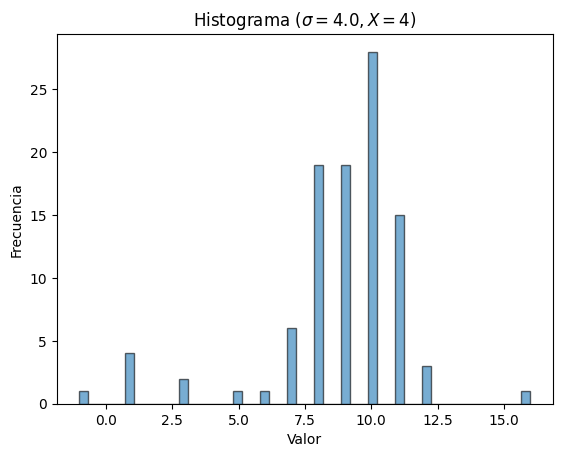

In [ ]:
HistogramaResta(tamano_lista, lista, sigma, configuracion,num_ejecuciones)

Análisis para $\sigma = 4.0, X = 4$:
  Media: 0.19252222777222777
  Mediana: 0.11805555555555555
  Desviación estándar: 0.15884002390105986
  Varianza: 0.02523015319288927
  Sesgo (Asimetría): 2.2477471860749882
  Curtosis: 6.038580373601418
  Coeficiente de variación: 0.8250477139137555



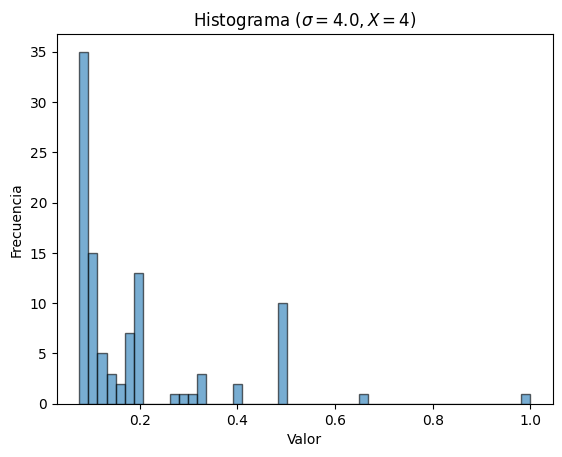

In [ ]:
HistogramaCuociente(tamano_lista, lista, sigma, configuracion,num_ejecuciones)

## Simulaciones para bloques de 1 linea

En esta sección presentaremos los resultados obtenidos al realizar las simulaciones.

In [ ]:
#Definimos 2 data frame donde registramos los resultados de los tiempos tras variaciones de sigma.

# Crear un diccionario con los datos
DataPrimeraCoalescencia = {
    'Sigma': [0, 0.5, 1, 5,7, 10],
    '#X=2': [0.999, 0.602, 0.431, 0.157,0.118,0.090],
    '#X=3': [0.338, 0.244, 0.217, 0.092,0.070,0.057],
    '#X=4': [0.161, 0.133, 0.117, 0.059,0.051,0.041],
    '#X=10': [0.022, 0.021, 0.019, 0.014,0.013,0.011]
}

# Crear un diccionario con los datos
DataUltimaCoalescencia = {
    'Sigma': [0, 0.5, 1, 5,7, 10],
    '#X=2': [1.001, 0.604, 0.441,0.154,0.117,0.087],
    '#X=3': [1.321, 0.693, 0.488, 0.151,0.117,0.087],
    '#X=4': [1.473, 0.759, 0.493, 0.142,0.110,0.081],
    '#X=10': [1.820, 0.716,0.444, 0.124,0.092,0.071]
}
# Crear el DataFrame
df0 = pd.DataFrame(DataPrimeraCoalescencia)
# Crear el DataFrame
df1 = pd.DataFrame(DataUltimaCoalescencia)
# Mostrar el DataFrame

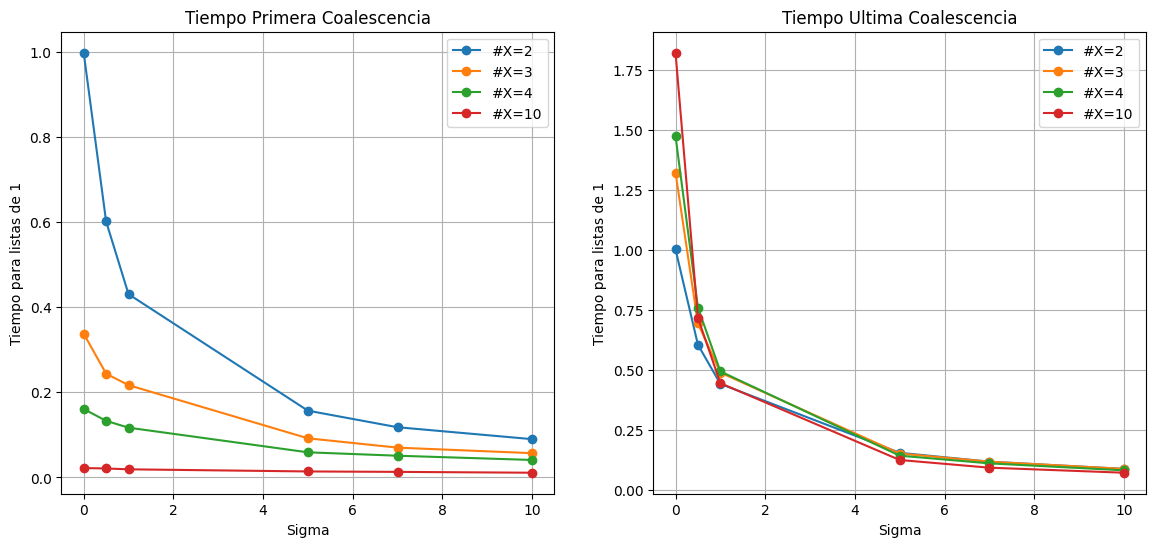

In [ ]:

#Graficos de los data frame anteriores.
columna_fija = 'Sigma'
# Definir las columnas variables que quieres graficar para el primer conjunto de datos
columnas_variables_primera = ['#X=2', '#X=3', '#X=4', '#X=10']

# Definir las columnas variables que quieres graficar para el segundo conjunto de datos
columnas_variables_ultima = ['#X=2', '#X=3', '#X=4', '#X=10']

# Graficar
plt.figure(figsize=(14, 6))

# Graficar para el primer conjunto de datos
plt.subplot(1, 2, 1)
for col in columnas_variables_primera:
    plt.plot(df0[columna_fija], df0[col], marker='o', label=col)
plt.title('Tiempo Primera Coalescencia')
plt.xlabel('Sigma')
plt.ylabel('Tiempo para listas de 1')
plt.legend()
plt.grid(True)

# Graficar para el segundo conjunto de datos
plt.subplot(1, 2, 2)
for col in columnas_variables_ultima:
    plt.plot(df1[columna_fija], df1[col], marker='o', label=col)
plt.title('Tiempo Ultima Coalescencia')
plt.xlabel('Sigma')
plt.ylabel('Tiempo para listas de 1')
plt.legend()
plt.grid(True)
plt.show()


## Realizaremos las comparativas para el ASG-DUAL

Cota inferior de E(τ)

In [ ]:
# Definimos la cota inferior encontrada teoricamente con un ejemplo
def PromedioPoisson(n,sigma):
    lam=sigma*2
    return(float(2/(n*(n-1)) *  ((1-mpmath.exp(-lam))/lam)**2))
#n es cantidad de bloques, es decir #X
n=2
sigma=1
PromedioPoisson(n,sigma)

0.1869112681038772

In [ ]:
#Creamos 2 data frames comparando los resultados del modelo junto a los resultados de la cota inferior de Esperanza(\tau)
DataPrimeraCoalescencia0 = {
    'Sigma': [1,1.5,2,5, 10],
    'Modelo,#X=2': [0.281,0.156,0.094 ,0.012,0.0027],
    'CotaInferior,#X=2': [0.186,0.100,0.060 ,0.009,0.0024 ],

}
dfs0 = pd.DataFrame(DataPrimeraCoalescencia0)

DataPrimeraCoalescencia1 = {
    'Sigma': [1,1.5,2,5, 10],
    'Modelo,#X=3': [0.094,0.044,0.027 ,0.004,0.0008 ],
    'CotaInferior,#X=3': [0.062,0.033,0.0200 ,0.0033,0.00083 ],

}
dfs1 = pd.DataFrame(DataPrimeraCoalescencia1)


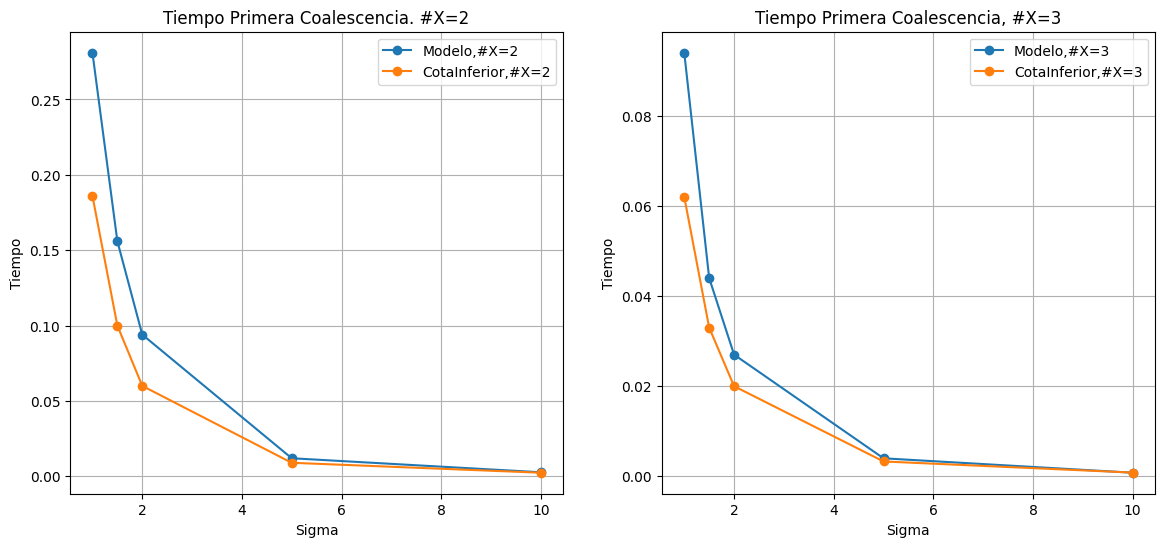

In [ ]:
columna_fija = 'Sigma'

# Definir las columnas variables que quieres graficar para el primer conjunto de datos
columnas_variables_primera = ['Modelo,#X=2', 'CotaInferior,#X=2']

# Definir las columnas variables que quieres graficar para el segundo conjunto de datos
columnas_variables_ultima = ['Modelo,#X=3', 'CotaInferior,#X=3']

# Graficar
plt.figure(figsize=(14, 6))

# Graficar para el primer conjunto de datos
plt.subplot(1, 2, 1)
for col in columnas_variables_primera:
    plt.plot(dfs0[columna_fija], dfs0[col], marker='o', label=col)
plt.title('Tiempo Primera Coalescencia. #X=2')
plt.xlabel('Sigma')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)

# Graficar para el segundo conjunto de datos
plt.subplot(1, 2, 2)
for col in columnas_variables_ultima:
    plt.plot(dfs1[columna_fija], dfs1[col], marker='o', label=col)
plt.title('Tiempo Primera Coalescencia, #X=3')
plt.xlabel('Sigma')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)

plt.show()
